# DCGAN のトレーニング

## import packages

In [0]:
import numpy as np
import pathlib
import pickle

from matplotlib import pyplot as plt
from PIL import Image
from google.colab import drive

## DCGAN のコードを取得

In [2]:
!git clone https://github.com/iimuz/dcgan.git
%cd dcgan

Cloning into 'dcgan'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 33 (delta 15), reused 26 (delta 11), pack-reused 0
Unpacking objects: 100% (33/33), done.
/content/dcgan


## データ退避先の google drive をマウント

Google drive のパスにスペースが含まれており、後段で取り回しにくいので symlink で対応します。
以降では `LOG_DIR` にファイルが出力されます。

In [4]:
GDRIVE_DIR = pathlib.Path('/content/drive/My Drive/dcgan')
LOG_DIR = pathlib.Path('logs')


def mount_gdrive(gdrive: pathlib.Path) -> None:
    if gdrive.exists() == False:
        drive.mount('/content/drive')
        !ln -s "$GDRIVE_DIR" $LOG_DIR

    !mkdir -p "$gdrive"


mount_gdrive(GDRIVE_DIR)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## トレーニングの実行

In [5]:
NUM_EPOCH = 25

%run -i train.py \
    --batch_size 127 \
    --learning_rate 2e-4 \
    --epochs $NUM_EPOCH \
    --z_dim 62 \
    --checkpoint_images 64 \
    --log_dir "$LOG_DIR" \
    --cuda

parameters: Namespace(batch_size=127, checkpoint_images=64, is_cuda=True, learning_rate=0.0002, log_dir=PosixPath('logs'), num_epoch=25, z_dim=62)
cuda state: True


0it [00:00, ?it/s]

9920512it [00:01, 8235497.09it/s]                            


Extracting data/mnist/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 135737.22it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2221461.33it/s]                            
0it [00:00, ?it/s]

Extracting data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 51599.64it/s]            


Extracting data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!
epoch 0, d_loss: 0.006646, g_loss: 0.01026
epoch 1, d_loss: 0.006572, g_loss: 0.01097
epoch 2, d_loss: 0.006894, g_loss: 0.01054
epoch 3, d_loss: 0.006899, g_loss: 0.01061
epoch 4, d_loss: 0.006723, g_loss: 0.01099
epoch 5, d_loss: 0.006606, g_loss: 0.01132
epoch 6, d_loss: 0.006527, g_loss: 0.01155
epoch 7, d_loss: 0.006382, g_loss: 0.01178
epoch 8, d_loss: 0.006274, g_loss: 0.0122
epoch 9, d_loss: 0.006111, g_loss: 0.0124
epoch 10, d_loss: 0.00592, g_loss: 0.01278
epoch 11, d_loss: 0.005822, g_loss: 0.01314
epoch 12, d_loss: 0.005711, g_loss: 0.01336
epoch 13, d_loss: 0.005542, g_loss: 0.01385
epoch 14, d_loss: 0.005417, g_loss: 0.0141
epoch 15, d_loss: 0.005231, g_loss: 0.01439
epoch 16, d_loss: 0.005207, g_loss: 0.01479
epoch 17, d_loss: 0.004969, g_loss: 0.01524
epoch 18, d_loss: 0.004835, g_loss: 0.01539
epoch 19, d_loss: 0.004682, g_loss: 0.01579
epoch 20, d_loss: 0.004624, g_loss: 0.01616
epoch 21, d_

## ログデータの表示

### Generator と Discriminator の loss プロット

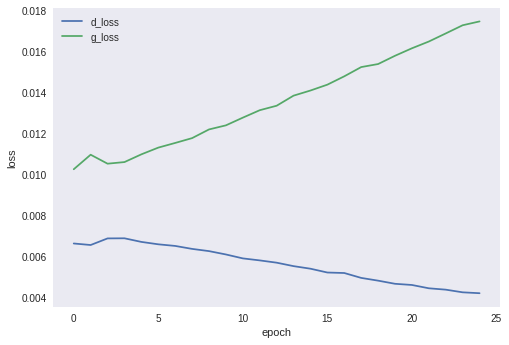

In [6]:
def plot_loss(log_dir: pathlib.Path):
    with open(log_dir.joinpath('history.pkl'), 'rb') as f:
        history = pickle.load(f)

    d_loss = [val['d_loss'] for val in history]
    g_loss = [val['g_loss'] for val in history]
    plt.plot(d_loss, label='d_loss')
    plt.plot(g_loss, label='g_loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.grid()


plot_loss(log_dir=LOG_DIR)

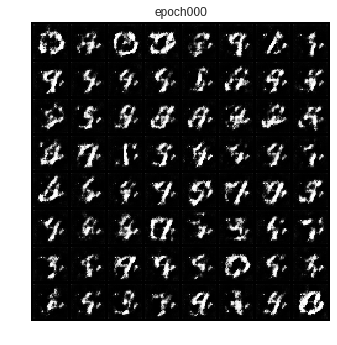

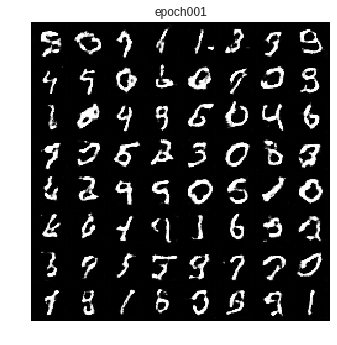

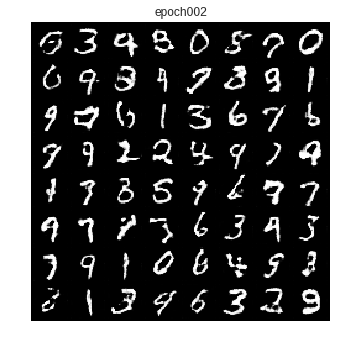

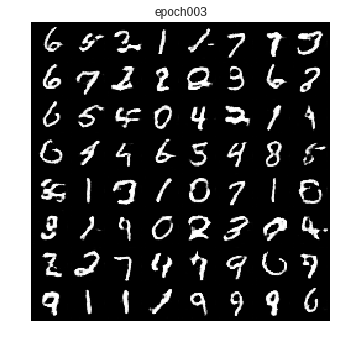

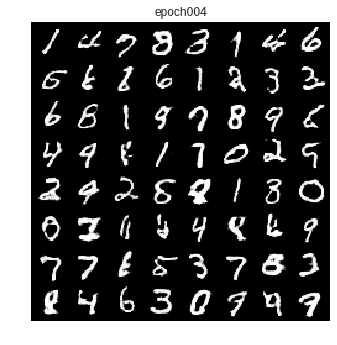

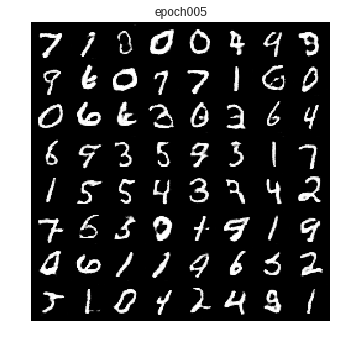

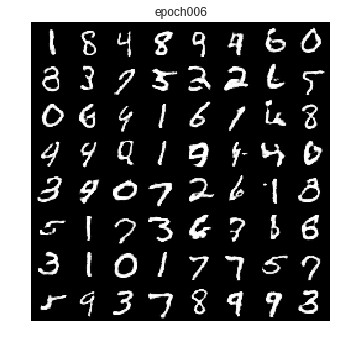

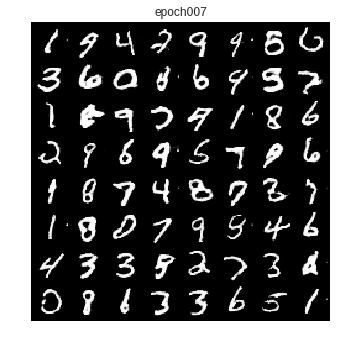

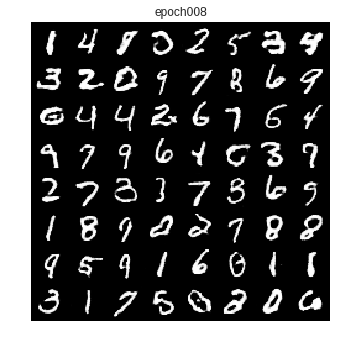

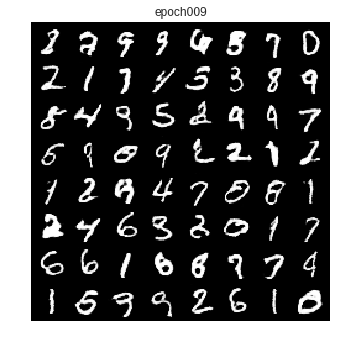

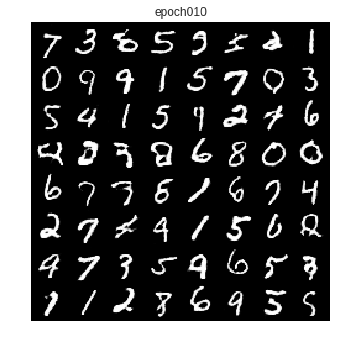

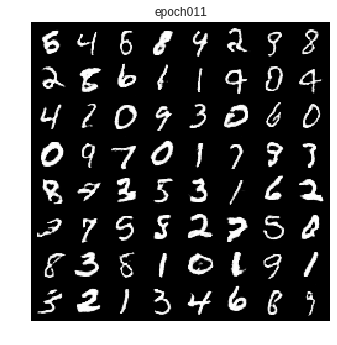

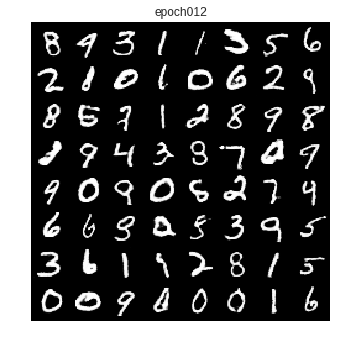

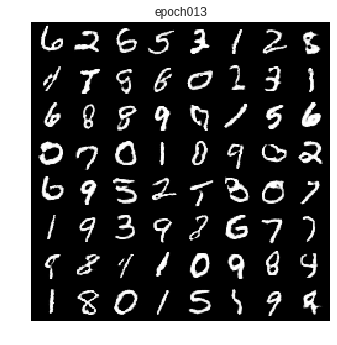

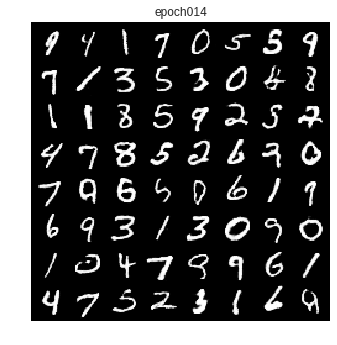

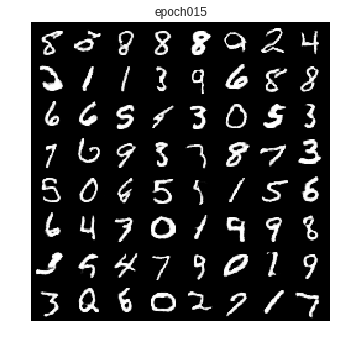

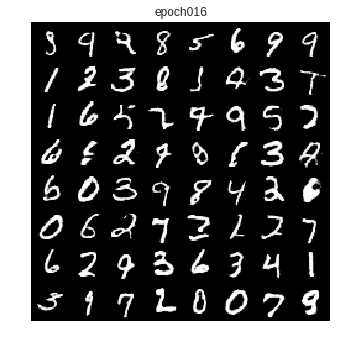

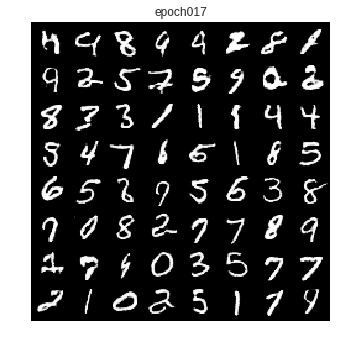

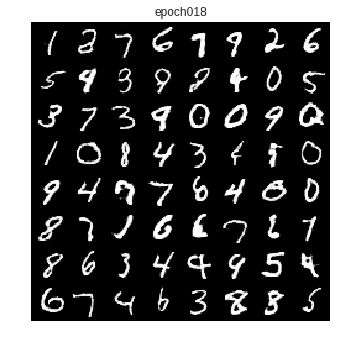

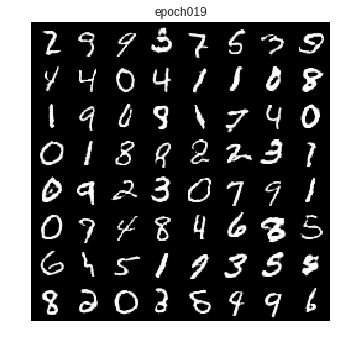

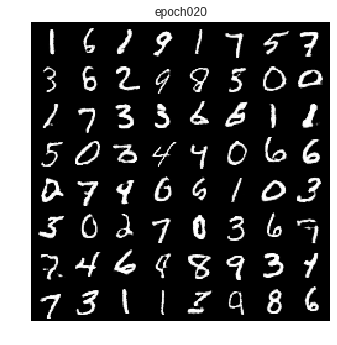

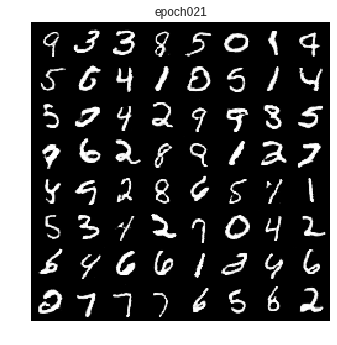

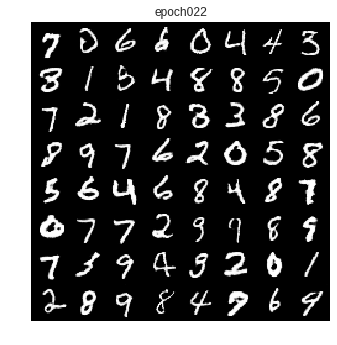

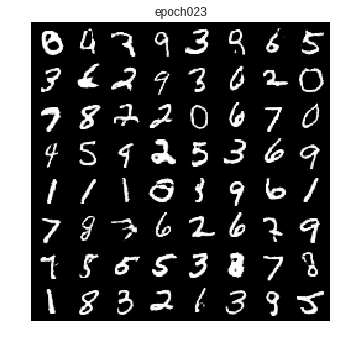

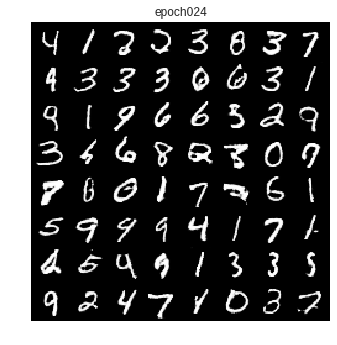

In [7]:
def show_checkpoint_images(log_dir: pathlib.Path, epoch_num: int) -> None:
    for epoch in range(epoch_num):
        plt.axis('off')
        plt.imshow(np.array(Image.open(f'{LOG_DIR}/epoch_{epoch:03}.png')))
        plt.title(f'epoch{epoch:03}')
        plt.show()


show_checkpoint_images(log_dir=LOG_DIR, epoch_num=NUM_EPOCH)